<a href="https://colab.research.google.com/github/iqbalhanif/Python-Intro/blob/main/Data_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Artist Layer (ax)

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas #impor FigureCanvas
from matplotlib.figure import Figure #import Figure artist

fig = Figure()
canvas= FigureCanvas(fig)

In [ ]:
#create 10000 random numbers using numpy
import numpy as np
x = np.random.rand(10000)
x

array([0.62511405, 0.42636465, 0.40381144, ..., 0.65478507, 0.39097161,
       0.8389291 ])

In [ ]:
ax = fig.add_subplot(111) #create an axes artist

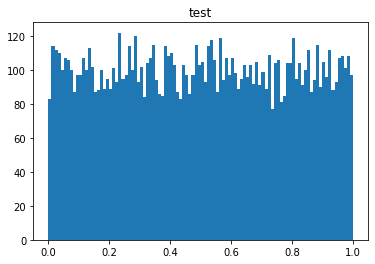

In [ ]:
ax.hist(x, 100) #generate a histogram of the 10000 numbers
ax.set_title("test")
ax.figure

# Scripting Layer (plt)

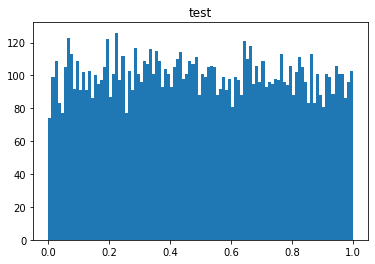

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(10000)
plt.hist(x, 100)
plt.title('test')
plt.show()

# Matplotlib Function

In [ ]:
import matplotlib.pyplot as plt

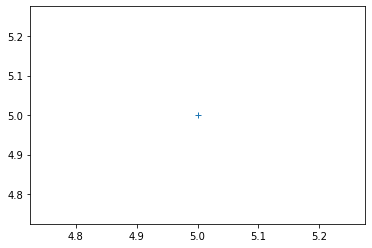

In [ ]:
plt.plot(5,5,'+')
plt.show()

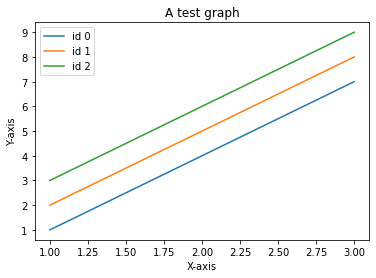

In [ ]:
x = [1,2,3]
y = [[1,2,3],[4,5,6],[7,8,9]]
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("A test graph")
for i in range(len(y[0])):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%i)
plt.legend()
plt.show()

# Pandas Plotting (Line Chart & Histogram)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Spatial Machine Learning Python/india_china.csv')
df = df.set_index('Year')
df.head()

,India,China
Year,,
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,3704,1527


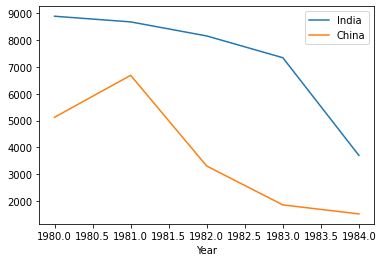

In [ ]:
df.plot(kind="line")

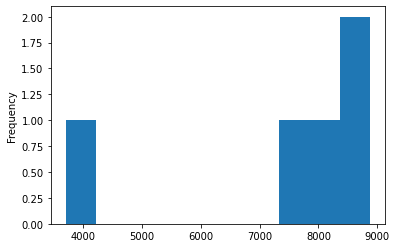

In [ ]:
df["India"].plot(kind="hist")

# Training Dataset : Canadian Citizenship

In [ ]:
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

df.to_excel('canada.xlsx')

In [ ]:
df = pd.read_excel('canada.xlsx')
df.head()

,Unnamed: 0,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


## Pandas Plotting

In [ ]:
df.columns.tolist()
df.index.tolist()

df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [ ]:
df = df.set_index('Country')
df.head()

,Unnamed: 0,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,2,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,3,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,4,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
df.index.name = None

In [ ]:
# 1. the full row data (all columns)
print(df.loc['Japan'])

# alternate methods
print(df.iloc[87])
print(df[df.index == 'Japan'].T.squeeze())

Unnamed: 0                   87
Continent                  Asia
Region             Eastern Asia
DevName       Developed regions
1980                        701
1981                        756
1982                        598
1983                        309
1984                        246
1985                        198
1986                        248
1987                        422
1988                        324
1989                        494
1990                        379
1991                        506
1992                        605
1993                        907
1994                        956
1995                        826
1996                        994
1997                        924
1998                        897
1999                       1083
2000                       1010
2001                       1092
2002                        806
2003                        817
2004                        973
2005                       1067
2006                       1212
2007    

In [ ]:
# 2. for year 2013
print(df.loc['Japan', 2013])

982


In [ ]:
haiti = df.loc['Haiti', range(1980, 2014)] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

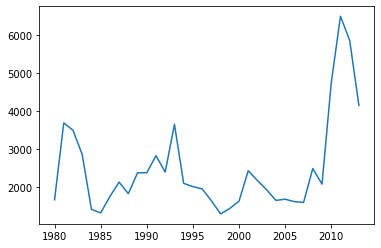

In [ ]:
haiti.plot()

# Area Plots

In [ ]:
df['Total'] = df.sum(axis=1)

In [ ]:
df.sort_values(['Total'], ascending = False, axis = 0)
df.head()

,Unnamed: 0,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,0,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,1,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15700
Algeria,2,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69441
American Samoa,3,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9
Andorra,4,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,19


In [ ]:
df_top5 = df.head()
df_top5 = df_top5[range(1980, 2014)].transpose()
df_top5.head()

,Afghanistan,Albania,Algeria,American Samoa,Andorra
1980,16,1,80,0,0
1981,39,0,67,1,0
1982,39,0,71,0,0
1983,47,0,69,0,0
1984,71,0,63,0,0


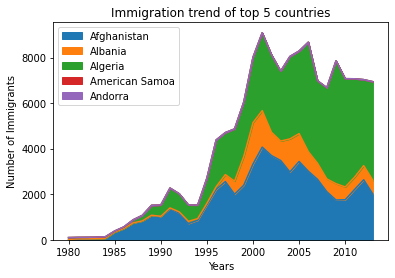

In [ ]:
df_top5.plot(kind='area')

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Histogram

In [ ]:
df.columns = list(map(str, df.columns))

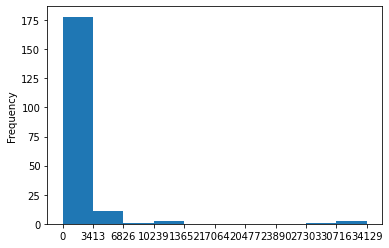

In [ ]:
count, bin_edges = np.histogram(df['2013'])
df['2013'].plot(kind='hist', xticks = bin_edges)

plt.show()

# Bar Charts

In [ ]:
years = list(map(str, range(1980,2014)))

df_iceland = df.loc['Iceland', years]

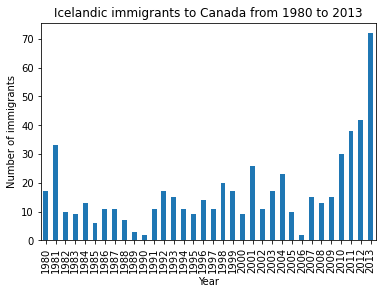

In [ ]:
df_iceland.plot(kind='bar')

plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')

plt.show()

# Pie Charts

In [ ]:
df_continents = df.groupby('Continent', axis = 0).sum()

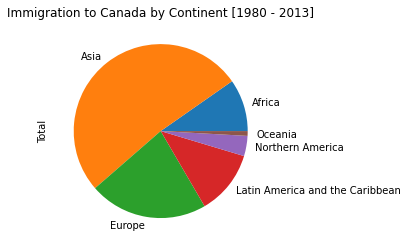

In [ ]:
df_continents['Total'].plot(kind='pie')

plt.title('Immigration to Canada by Continent [1980 - 2013]')

plt.show()

# Box Plot

In [ ]:
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


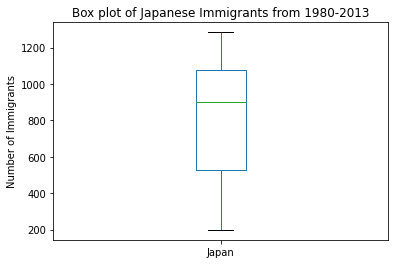

In [ ]:
df_japan.plot(kind = 'box')

plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

# Scatter Plots

In [ ]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


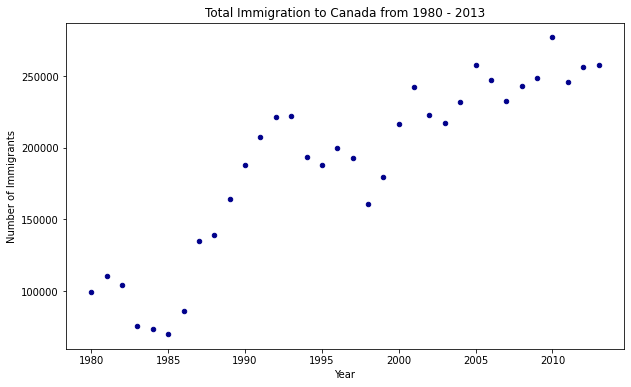

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

# Waffle Charts

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [ ]:
df_dsn = df.loc[['Denmark', 'Norway', 'Sweden'], :]

width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 127
Norway: 79
Sweden: 194


<Figure size 432x288 with 0 Axes>

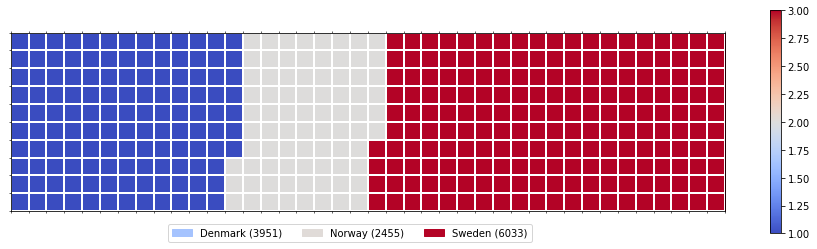

In [ ]:
create_waffle_chart(categories, values, height, width, colormap)

# Word Clouds

In [ ]:
# -m pip install wordcloud
from wordcloud import WordCloud, STOPWORDS



df_word = pd.read_fwf('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt')
df_word.to_csv('alice_novel.txt', sep=' ', index=False, header=False)

In [ ]:
alice_novel = open('/content/drive/MyDrive/Spatial Machine Learning Python/alice_novel.txt', 'r').read()

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

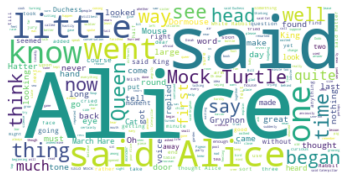

In [ ]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

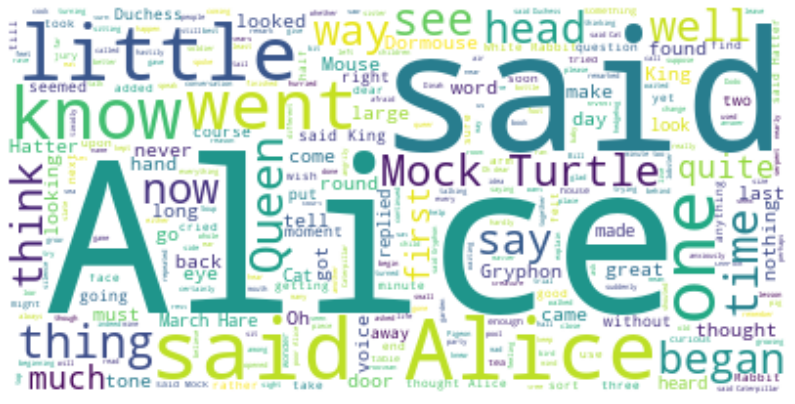

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

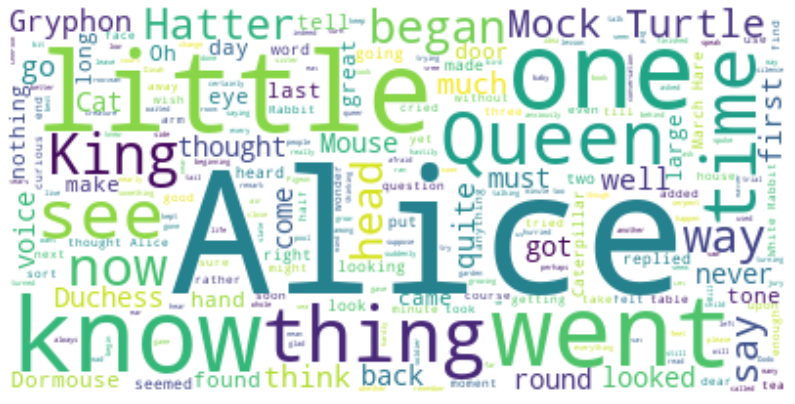

In [ ]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plots with Seaborn

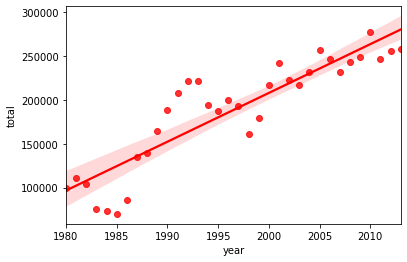

In [ ]:
import seaborn as sns
sns.regplot(x='year', y='total', data=df_tot, color='red', marker='o')

# Map and Geospatial Data

In [ ]:
import folium

world_map = folium.Map()
world_map

In [ ]:
mexico_latitude = 23.6345 
mexico_longitude = -102.5528

# define the world map centered around Canada with a higher zoom level
mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude], zoom_start=4)

# display world map
mexico_map


In [ ]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

In [ ]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

In [ ]:
# create a world map with a Mapbox Bright style.
world_map = folium.Map(tiles='Mapbox Bright')

# display the map
world_map

In [ ]:
canada_map = folium.Map(
    location=[56.130, -106.35],
    zoom_start=4
)

ontario = folium.map.FeatureGroup()

ontario.add_child(
    folium.CircleMarker(
    [51.25, -85.32], radius = 5,
        color = 'red', fill_color = "Red"
    )
)

canada_map.add_child(ontario)

folium.Marker(
    [51.25, -85.32],
    popup='Ontario').add_to(canada_map)

canada_map